---

###   Описание проекта
<em> Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга я подготовили список гипотез для увеличения выручки.
Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.<em>  

####  Цель исследования
<em> Узнать какая из гипотез приведёт к наибольшему увеличению выручки.<em>

####   Ход исследования
1. <em> Выполнить обзор и предобработку данных; <em>
2. <em> Выполнить приоритезацию гипотез; <em>
3. <em> Проанализировать A/В - тест, принять решение по его результату. <em>

### Обзор и предобработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

In [2]:
try:
    hypothesis = pd.read_csv('hypothesis.csv')
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')
except:
    print('FileNotFoundError')

In [3]:
pd.DataFrame(round(hypothesis.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
Hypothesis,0.000000
Reach,0.000000
Impact,0.000000
Confidence,0.000000
Efforts,0.000000


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [6]:
hypothesis.columns = [x.lower().replace(' ', '_') for x in hypothesis.columns]

In [7]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [8]:
pd.DataFrame(round(orders.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
transactionId,0.000000
visitorId,0.000000
date,0.000000
revenue,0.000000
group,0.000000


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [11]:
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns]

In [12]:
orders.columns = ['transaction_id','visitor_id', 'date','revenue','group']

In [13]:
orders['date'] = pd.to_datetime(orders['date'])

In [14]:
pd.DataFrame(round(visitors.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
date,0.000000
group,0.000000
visitors,0.000000


In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [16]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [17]:
visitors['date'] = pd.to_datetime(visitors['date'])

In [18]:
hypothesis.duplicated().sum()
orders.duplicated().sum()
visitors.duplicated().sum()

0

<strong> Мы выполнили предобработку данных: <strong>
1. <em> Столбцы приведены к нижнему регистру, пропуски между словами в названии убраны; <em>
2. <em> Столбец `date` преобразован к нужному типу данных; <em>
3. <em> Дубликатов и пропусков нет. <em>

### Приоритезация гипотез

#### ICE

In [19]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [20]:
pd.set_option('display.max_columns', None)

In [21]:
pd.options.display.max_colwidth = 150 
hypothesis.sort_values(by = 'ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


#### RICE

In [22]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [23]:
hypothesis.sort_values('RICE', ascending=False).style.background_gradient(subset = ["ICE","RICE"],cmap = "Reds")

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.200000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.000000


<em> При применение фреймворка RICE гипотеза № 7 стала иметь наибольший приоритет. Причина - наибольший параметр reach (охват пользователей) используемый при расчёте RICE. <em>

### Анализ A/B-теста

In [24]:
print(visitors['group'].unique())

['A' 'B']


<em> Пользователи делятся на 2 группы А И B.

In [25]:
print('Дата начала теста:',visitors['date'].min())
print('Дата окончания теста:',visitors['date'].max())

Дата начала теста: 2019-08-01 00:00:00
Дата окончания теста: 2019-08-31 00:00:00


<em> Тест проводится в течение августа 2019 года.

In [26]:
group_A = orders.query('group == "A"')
group_B = orders.query('group == "B"')
print('Пользователей в группе А:', len(group_A['visitor_id'].unique()))
print('Пользователей в группе B:', len(group_B['visitor_id'].unique()))

Пользователей в группе А: 503
Пользователей в группе B: 586


In [27]:
duplicated_users = orders.groupby('visitor_id').agg({'group': ['nunique', 'unique']})
duplicated_users.columns = ['groups', 'group_names']
duplicated_users = duplicated_users.query('groups > 1')
print('Пользователей попавших в обе группы:', len(duplicated_users))

Пользователей попавших в обе группы: 58


<em> Таких пользователей - 58, это около 10% в каждой группе, учитывая их можно исказить результаты, однако степень различия между группами не превышает 10%. Также мы не можем из разделить на 'платящих' и 'неплатящих'. Оставим данные без изменений.

#### Расчет кумулятивных метрик

In [28]:
datesGroups = orders[['date','group']].drop_duplicates().sort_values(by=['date', 'group'])

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(x['date'] >= orders['date'], x['group']==orders['group'])]\
.agg({'date':'max', 'group':'max', 'transaction_id':'nunique', 'visitor_id':'nunique', 'revenue':'sum'}), axis = 1)
ordersAggregated.columns = ['date', 'group', 'orders', 'buyers', 'revenue']

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(x['date'] >= visitors['date'], x['group']==visitors['group'])]\
.agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis = 1)

cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cummulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


#### График кумулятивной выручки

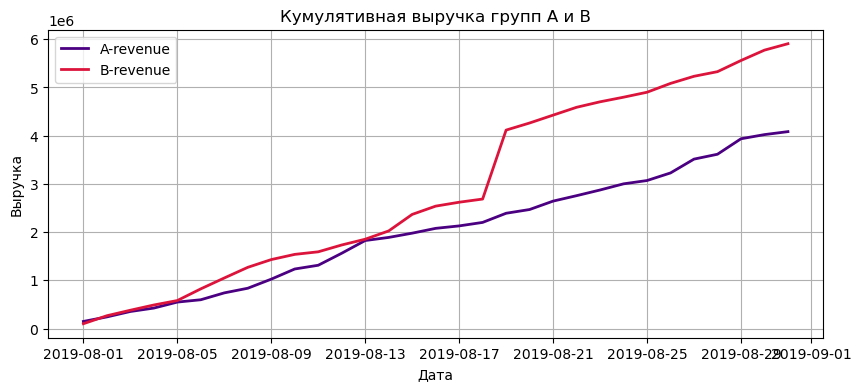

In [29]:
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']
plt.figure(figsize=(10,4))
plt.plot(cummulativeDataA['date'], cummulativeDataA['revenue'], label = 'A-revenue', linewidth = 2 , color = 'indigo')
plt.plot(cummulativeDataB['date'], cummulativeDataB['revenue'], label = 'B-revenue', linewidth = 2 , color = 'crimson')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('Кумулятивная выручка групп A и B')
plt.legend()
plt.grid()
plt.show()

<em> На графике видно, что при относительно одинаковом старте кривая выручки группы B выше группы А. Также заметен скачок после 2019-08-18 для кривой группы B.

#### График кумулятивного среднего чека

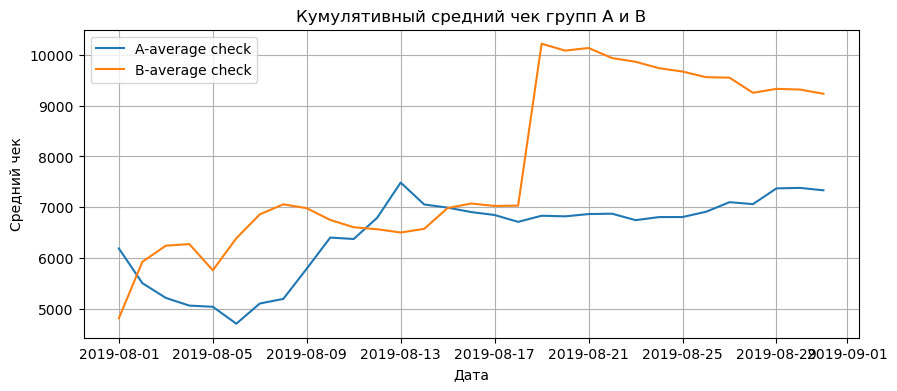

In [30]:
plt.figure(figsize=(10,4))
plt.plot(cummulativeDataA['date'], cummulativeDataA['revenue']/cummulativeDataA['orders'], label = 'A-average check')
plt.plot(cummulativeDataB['date'], cummulativeDataB['revenue']/cummulativeDataB['orders'], label = 'B-average check')
plt.title('Кумулятивный средний чек групп A и B')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.legend()
plt.grid()
plt.show()

<em> Кривая группы B также выше практически на всём периоде. Скачок 2019-08-18 аналогичен с графиком выручки.

#### График относительного изменения кумулятивного среднего чека 

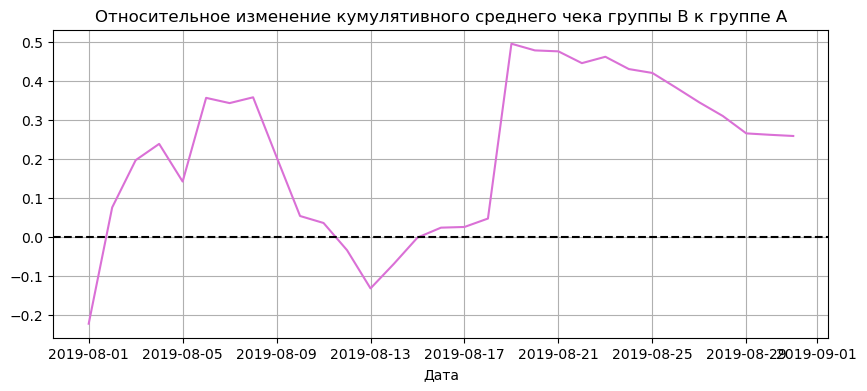

In [31]:
mergedCummulativeData = cummulativeDataA.merge(cummulativeDataB, left_on='date', right_on='date', suffixes=['A', 'B'])
plt.figure(figsize=(10,4))
plt.plot(mergedCummulativeData['date'], ((mergedCummulativeData['revenueB']/mergedCummulativeData['ordersB'])/
                                       (mergedCummulativeData['revenueA']/mergedCummulativeData['ordersA'])-1)
        , color = 'orchid')
plt.axhline(y=0, color='black', linestyle = '--')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.grid()
plt.show()

<em> Мы видим 2 скачка и 2 падения суммы чека группы B относительно А. Возможно причина в выбросах.

#### График кумулятивного среднего количества заказов на посетителя по группам

In [32]:
mergedCummulativeData['averageA'] =  mergedCummulativeData['ordersA']/mergedCummulativeData['visitorsA']
mergedCummulativeData['averageB'] =  mergedCummulativeData['ordersB']/mergedCummulativeData['visitorsB']
mergedCummulativeData.head()

,date,groupA,ordersA,buyersA,revenueA,visitorsA,groupB,ordersB,buyersB,revenueB,visitorsB,averageA,averageB
0,2019-08-01,A,24,20,148579,719,B,21,20,101217,713,0.033380,0.029453
1,2019-08-02,A,44,38,242401,1338,B,45,43,266748,1294,0.032885,0.034776
2,2019-08-03,A,68,62,354874,1845,B,61,59,380996,1803,0.036856,0.033833
3,2019-08-04,A,84,77,425699,2562,B,78,75,489567,2573,0.032787,0.030315
4,2019-08-05,A,109,100,549917,3318,B,101,98,581995,3280,0.032851,0.030793


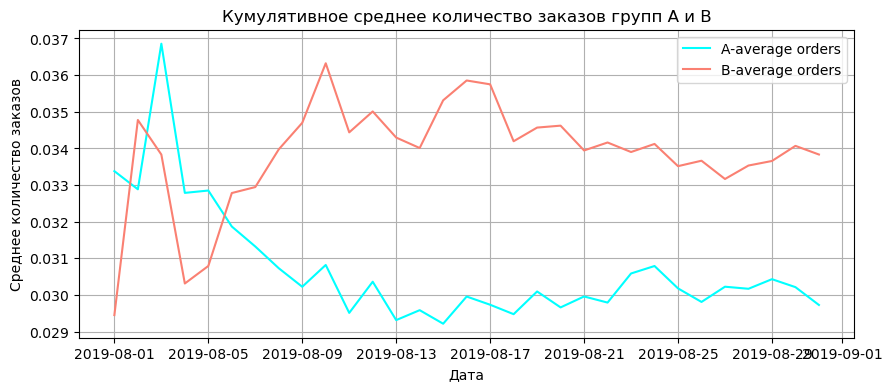

In [33]:
plt.figure(figsize=(10,4))
plt.plot(mergedCummulativeData['date'], mergedCummulativeData['averageA'], label='A-average orders', color = 'cyan')
plt.plot(mergedCummulativeData['date'], mergedCummulativeData['averageB'], label='B-average orders', color = 'salmon')
plt.title('Кумулятивное среднее количество заказов групп A и B')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')
plt.legend()
plt.grid()
plt.show()

<em> Кумулятивное среднее значение заказов группы B на посетителя выше после 1 недели.

#### График изменения кумулятивного среднего количества заказов

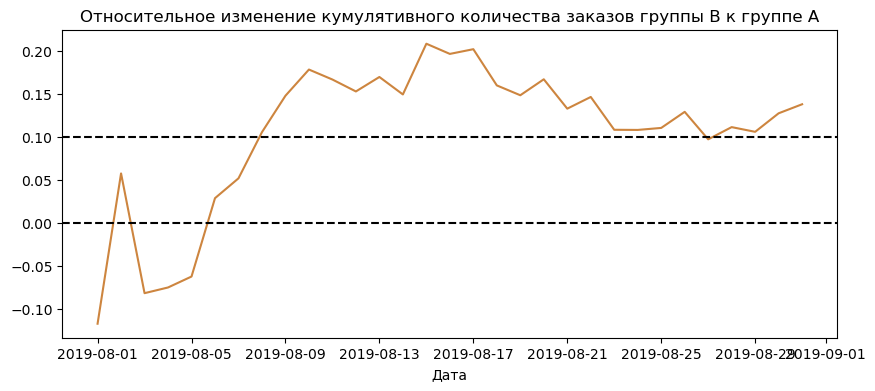

In [34]:
plt.figure(figsize=(10,4))
plt.plot(mergedCummulativeData['date'], ((mergedCummulativeData['averageB']/mergedCummulativeData['averageA'])-1), 
         color = 'peru')
plt.title('Относительное изменение кумулятивного количества заказов группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='black', linestyle='--')
plt.xlabel('Дата')
plt.show()

<em> Среднее число заказов группы B заметно больше группы А на всём периоде после первой недели.

#### Точечный график количества заказов по пользователям

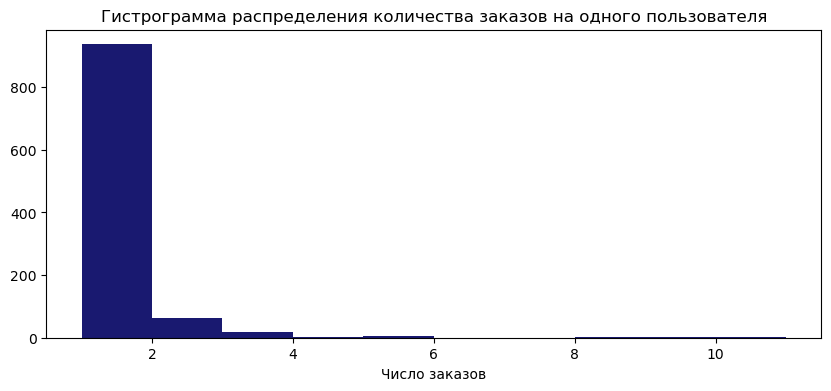

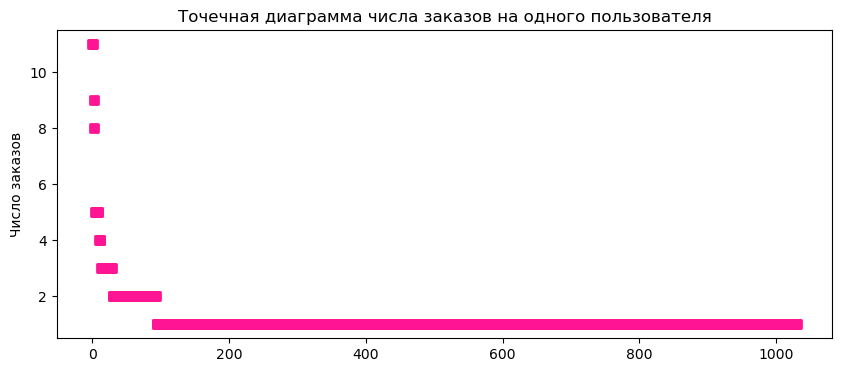

In [35]:
ordersByUsers = orders.groupby('visitor_id', as_index = False).agg({'transaction_id':'nunique'}).sort_values(by='transaction_id', ascending = False)
ordersByUsers.columns = ['visitor_id', 'orders']
plt.figure(figsize=(10,4))
plt.hist(ordersByUsers['orders'] , histtype='stepfilled', color='midnightblue')
plt.xlabel('Число заказов')
plt.title('Гистрограмма распределения количества заказов на одного пользователя')
plt.show()
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(10,4))
plt.scatter(x_values, ordersByUsers['orders'] , linewidths = 2,
            marker ="s", color = 'deeppink')
plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.ylabel('Число заказов')
plt.show()

<em> Число заказов большинства пользователей не превышает 2.

#### 95-й и 99-й перцентили количества заказов на пользователя. Граница для определения аномальных пользователей

In [36]:
percentiles_orders = np.percentile(ordersByUsers['orders'], [95, 99])
print(percentiles_orders)

[2. 4.]


<em> Более 2-х заказов совершают только 5% пользователей.

#### Tочечный график стоимостей заказов

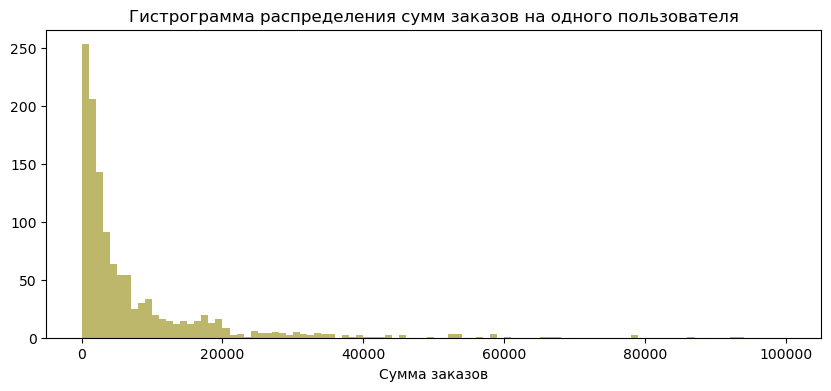

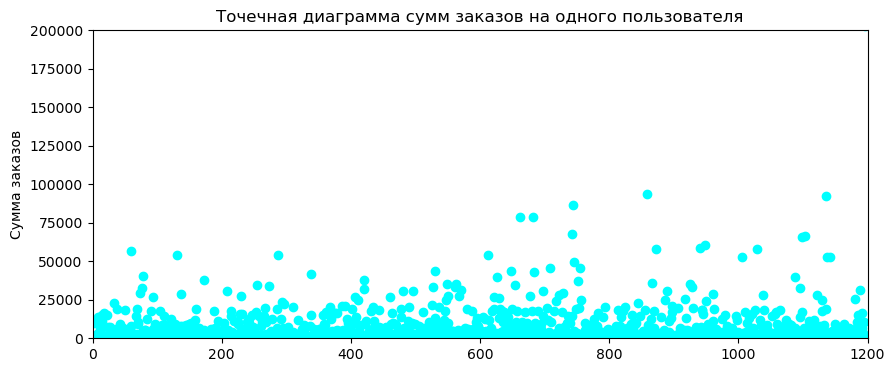

In [37]:
plt.figure(figsize=(10,4))
plt.hist(orders['revenue'], range=(0,100000), bins = 100, color = 'darkkhaki')
plt.title('Гистрограмма распределения сумм заказов на одного пользователя')
plt.xlabel('Cумма заказов')
plt.show()
x_values = pd.Series(range(0, len(orders)))
plt.figure(figsize=(10,4))
plt.scatter(x_values, orders['revenue'], color = 'aqua')
plt.title('Точечная диаграмма сумм заказов на одного пользователя')
plt.axis([0, 1200, 0, 200000])
plt.ylabel('Cумма заказов')
plt.show()

<em> Большая часть заказов пользователей не превышет сумму 20 тысяч.

#### 95-й и 99-й перцентили стоимости заказов. Граница для определения аномальных заказов

In [38]:
percentiles_revenue = np.percentile(orders['revenue'], [95, 99])
print(percentiles_revenue)

[28000.  58233.2]


<em> Более 28 тысяч тратят только 5% пользователей.

#### Cтатистическая значимость различий в среднем количестве заказов между группами по «сырым» данным

<strong> Сформулируем гипотезы: <strong>

<em> Н0 :Статистически значимых различий в среднем количестве заказов на посетителя между группами  нет;

<em> Н1 : Статистически значимые различия в в среднем количестве заказов на посетителя между группами между группами есть

<em> Для тестирования воспользуемся критерием Манна-Уитни, уровнем статистической значимости примем значение 0,05

In [39]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'})
ordersByUsersA.columns = ['visitor_id', 'orders']
ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'})
ordersByUsersB.columns = ['visitor_id', 'orders']
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB, True, 'two-sided')[1]))


print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.017
0.138


<em> По "сырым" данным значение p-value = 0.017, это меньше уровня статистической значимости, следовательно гипотезу о том, что различий в среднем количестве заказов на посетителя  между группами нет, можно отвергнуть. Относительная разница в среднем числе заказов между группами составила 13,8%.

#### Cтатистическая разница различий в среднем чеке заказа между группами по «сырым» данным

<strong> Сформулируем гипотезы: <strong>

<em> Н0 :статистически значимых различий в среднем чеке заказа между группами нет;

<em> Н1 : статистически значимые различия в среднем чеке заказа между группами есть

<em> Для тестирования воспользуемся тестом Манна-Уитни, уровнем статистической значимости примем значение 0,05

In [40]:
print('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], True, 'two-sided')[1]))

print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.729
0.259


<em> По "сырым" данным значение p-value = 0.729, это больше уровня статистической значимости, следовательно гипотезу о том, что различий в сумме среднего чека между группами нет, не отвергаем. Относительная разница суммы среднего чека между группами составила 25.8%.

#### Cтатистическая значимость различий в среднем количестве заказов между группами по «очищенным» данным

<strong>Сформулируем гипотезы:<strong>

<em> Н0 :статистически значимых различий в среднем количестве заказов между группами нет;

<em> Н1 : статистически значимые различия в среднем количестве заказов между группами есть

<em> Для тестирования воспользуемся тестом Манна-Уитни, уровнем статистической значимости примем значение 0,05

In [41]:
usersWithManyOrdersA = ordersByUsersA[ordersByUsersA['orders'] > percentiles_orders[0]]['visitor_id']
  
usersWithExpensiveOrdersA = orders[orders['revenue'] > percentiles_revenue[0]]['visitor_id']
abnormalUsersA = (
    pd.concat([usersWithManyOrdersA, usersWithExpensiveOrdersA], axis=0)
    .drop_duplicates()
    .sort_values()
)
print('Число аномальных пользователей группы A:',abnormalUsersA.count()) 

Число аномальных пользователей группы A: 68


In [42]:
usersWithManyOrdersB = ordersByUsersB[ordersByUsersB['orders'] > percentiles_orders[0]]['visitor_id']
  
usersWithExpensiveOrdersB = orders[orders['revenue'] > percentiles_revenue[0]]['visitor_id']
abnormalUsersB = (
    pd.concat([usersWithManyOrdersB, usersWithExpensiveOrdersB], axis=0)
    .drop_duplicates()
    .sort_values()
)
print('Число аномальных пользователей группы В:',abnormalUsersB.count()) 

Число аномальных пользователей группы В: 65


In [43]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsersA))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsersB))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [44]:
print('{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered, True, 'two-sided')[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.013
0.173


<em> По "очищенным" данным значение p-value = 0.013, ниже чем по "сырым" и меньше уровня статистической значимости, следовательно гипотезу о том, что различий в между средним количеством заказов между группами нет, отвергаем. Относительная разница среднего количества заказов между группами составила 17.3%

#### Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

<strong>Сформулируем гипотезы:<strong>

<em> Н0 :статистически значимых различий в среднем чеке заказа между группами нет;

<em> Н1 : статистически значимые различия в среднем чеке заказа между группами есть

<em> Для тестирования воспользуемся тестом Манна-Уитни, уровнем статистической значимости примем значение 0,05

In [45]:
print(
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsersA)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsersB))
                )
            ]['revenue'], True, 'two-sided',
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsersB)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsersA)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.869
-0.012


<em> По "oчищенным" данным значение p-value = 0.869, что значительно больше уровня статистической значимости, следовательно гипотезу о том, что различий в сумме среднего чека между группами нет, не отвергаем.

<em> Относительная разница суммы среднего чека между группами составила -1.2%, после "очищения" данных отличия среднего чека между группами практически нет. 

### Выводы

- <em> Кумулятивные метрики группы B опережают группу А.

- <em>Был произведен расчет статистической значимости различий в среднем количестве заказов на посетителя и в сумме среднего чека между группами по «сырым» и "очищенным" от выбросов данным, по его итогам гипотеза о равенстве среднего количества заказов между группами отвергнута, а относительная разница среднего количества заказов на посетителя группы В на 13.8% больше, чем в группе А. При тестировании "очищенных" от выбросов данных результат также подтвердился: среднее количество заказов на посетителя отличается, а относительная разница составила 17.3%.

- <em>Гипотеза о том, что различий в сумме среднего чека между группами нет, не отвергнута.Разница суммы среднего чека между группами составила 25.8% по "сырым" данным. После удаления выбросов разница между чеками групп составила -1.2%.

- <em> Принято решение остановить тест и зафиксировать "победу" группы B.

---